Import the necessary libraries

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Read the input csv file into a dataframe 'tcc'

In [7]:
tcc=pd.read_csv("../dataset/tele_customer_churn.csv")

In [8]:
tcc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
tcc.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [10]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
def datview(df,msg):
    print(f'{msg}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

datview(tcc,'Overview of the dataset')

Overview of the dataset:n
Number of rows:  7043
nNumber of features: 21
nData Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
nMissing values: 0
nUnique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


Our dataset consist of 7043 rows and 21 columns.

Categorical variables: 17

Binary categorical variables: 6

Numerical variables: 3

Prediction variable: 1

## Categorical variables

1. customerID         - Unique identifier for each customers

2. MultipleLines      -Whether the customer has multiple lines or not (Yes, No, No phone service)

3. InternetService    -Customer’s internet service provider (DSL, Fiber optic, No) 

4. OnlineSecurity     -Whether the customer has online security or not (Yes, No, No internet service) 

5. OnlineBackup       -Whether the customer has an online backup or not (Yes, No, No internet service) 

6. DeviceProtection   -Whether the customer has device protection or not (Yes, No, No internet service) 

7. TechSupport        -Whether the customer has tech support or not (Yes, No, No internet service)   

8. StreamingTV        -Whether the customer has streaming TV or not (Yes, No, No internet service)   

9. StreamingMovies    -Whether the customer has streaming movies or not (Yes, No, No internet service) 

10. Contract          -The contract term of the customer (Month-to-month, One year, Two years)   

11. PaperlessBilling  -The contract term of the customer (Month-to-month, One year, Two years)  

12. PaymentMethod     -The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic),Credit card automatic))  

## Binary categorical variables

13. gender             - Gender of the customer( Female, Male)

14. SeniorCitizen      - Whether the customer is senior citizen or not (0,1)

15. Partner            - Whether the customer has a partner or not (Yes, No)

16. Dependents          -Whether the customer has dependents or not (Yes, No)  

17. PhoneService        -Whether the customer has a phone service or not (Yes, No)  

## Numeric variables

1. Tenure: Number of months the customer has stayed with the company

2. MonthlyCharges: The amount charged to the customer monthly

3. TotalCharges: The total amount charged to the customer


Categorical variables with two values

In [12]:
columns = tcc.columns
binary_cols = []
for col in columns:
    if tcc[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [13]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

## Exploratory Data Analysis

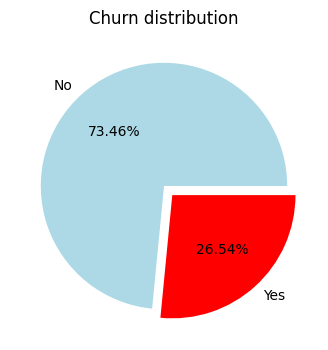

In [14]:
# Getting a sense of the percentage of churn labels
churn_label_count = tcc["Churn"].value_counts()
churn_label_count
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Churn distribution")
plt.show()

The target variable 'Churn' is a binary categorical variable with an unbalanced distribution.

Churn Yes: 26.54%

Churn No : 73.46% 

### Replace Churn column ("no and yes") into 0 and 1

In [15]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#Defining bar chart function
def bar(feature, df=tcc ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, '  
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_map={0: "blue", 1: "red"})
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=2.0,
                y=1.2,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        
        margin=dict(r=400),
    )
     
    return fig.show()

In [17]:
bar('gender')
tcc.loc[tcc.SeniorCitizen==0,'SeniorCitizen'] = "No"   
tcc.loc[tcc.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  
bar('SeniorCitizen')
bar('Partner')
bar('Dependents')

In [18]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

Services that each customer has signed up for insight: These features show significant variations across their values.
If a customer doesn’t have phone service, they can’t have multiple lines. 
About 90.3% of the customers have phone services and have a higher rate to churn. 
Customers who have fibre optic as an internet service are more likely to churn.
This can happen due to high prices, competition, customer service, and many other reasons. 
Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn. 
Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. 
Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

In [19]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

Payment insights: The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

In [20]:
tcc.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
def hist(feature):
    group_df = tcc.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["lightgreen", "lightpink"])
    fig.show()

In [22]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

Customer account information insight: The tenure histogram is rightly skewed and shows that most customers have been with the telecom company for just the first few months (0-9 months). The highest rate of churn is also in the first few months (0-9months). 75% of customers who end up leaving the Telecom company do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. This suggests that discounts and promotions can be an enticing reason for customers to stay.



## Model building

In [23]:
binary_cols.pop()

'Churn'

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()

tcc['Churn'] = LabelEncoder_y.fit_transform(tcc['Churn'])

In [25]:
cat_cols = tcc[binary_cols]

fig, axes = plt.subplots(3, 2, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cat_cols.columns):
    ax = axes[i]
    sns.countplot(data=tcc, x=col, hue="Churn", ax=ax, palette="prism",alpha=0.5)
    ax.legend(frameon=True, facecolor="inherit", shadow=True,labels=['Not Churn','Churn'])
    ax.set_title(f"Churn by {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)

plt.tight_layout()

## Model Building

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()

tcc['SeniorCitizen'] = LabelEncoder_y.fit_transform(tcc['SeniorCitizen'])
tcc['Partner'] = LabelEncoder_y.fit_transform(tcc['Partner'])
tcc['Dependents'] = LabelEncoder_y.fit_transform(tcc['Dependents'])
tcc['PaperlessBilling'] = LabelEncoder_y.fit_transform(tcc['PaperlessBilling'])

In [96]:
features = ['Contract',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaymentMethod']
tcc_dummies = pd.get_dummies(tcc, columns=features, drop_first=True,dtype=int)

In [97]:
tcc_dummies.TotalCharges = pd.to_numeric(tcc_dummies.TotalCharges, errors='coerce')
tcc_dummies.MonthlyCharges = pd.to_numeric(tcc_dummies.MonthlyCharges, errors='coerce')


In [98]:
tcc_dummies=tcc_dummies.dropna()

In [99]:
tcc_dummies.shape

(7032, 30)

In [100]:
y = tcc_dummies['Churn'].values
x = tcc_dummies.drop(columns = ['Churn','PhoneService','customerID','gender','StreamingMovies','StreamingTV'])

In [101]:
x

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,MultipleLines_No phone service,...,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,1,0,0,...,1,0,0,0,1,0,1,0,0,1
7039,0,1,1,72,1,103.20,7362.90,1,0,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,1,29.60,346.45,0,0,1,...,1,0,0,0,0,0,0,0,1,0
7041,1,1,0,4,1,74.40,306.60,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
print("\"X\" column list:", x.columns.tolist())


"X" column list: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [103]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35,random_state=50)

In [105]:
X_train.shape

(4570, 24)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm=LogisticRegression()
result=lm.fit(X_train,Y_train)

pred=lm.predict(X_test)
print (metrics.accuracy_score(Y_test, pred))

0.8184402924451666


In [107]:
cnf_matrix=metrics.confusion_matrix(Y_test,pred)
cnf_matrix

array([[1640,  179],
       [ 268,  375]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

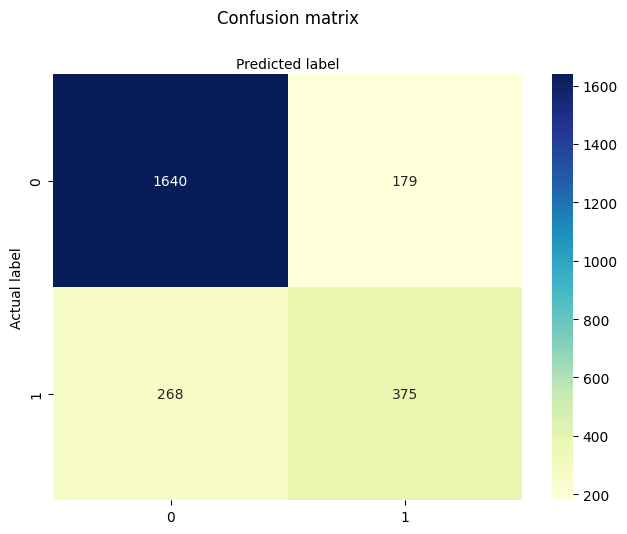

In [108]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Performance Evaluation

In [109]:
 #Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

print_scores(Y_test, pred)
    

accuracy:  0.8184402924451666
precision:  0.6768953068592057
recall:  0.583203732503888
f1_score:  0.8138583834030277


In [110]:
TP = cnf_matrix[1, 1]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
TN = cnf_matrix[0, 0]

print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Negative (TN): {TN}')

True Positive (TP): 375
False Positive (FP): 179
False Negative (FN): 268
True Negative (TN): 1640


Other performance metrics

Gini Coefficient: 0.6967725332309636
Mean Squared Error (MSE): 0.18155970755483347
Root Mean Squared Error (RMSE): 0.42609823697691296
Mean Absolute Error (MAE): 0.18155970755483347


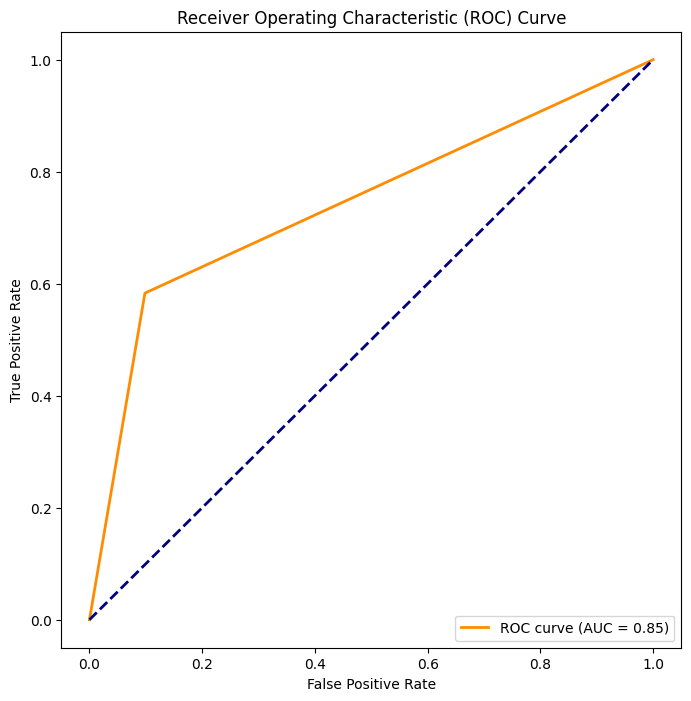

In [111]:
from sklearn.metrics import roc_curve, auc,mean_squared_error, mean_absolute_error,roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, pred)

# Calculate AUC (Area Under the Curve)
roc_auc2 = auc(fpr, tpr)
y_pred_lr = lm.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_lr)
gini_coefficient = 2 * (roc_auc - 0.5)

print(f"Gini Coefficient: {gini_coefficient}")\

mse = mean_squared_error(Y_test, pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(Y_test, pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


An AUROC of 0.5 (area under the red dashed line in the figure above) corresponds to a coin flip, i.e. a useless model.
An AUROC less than 0.7 is sub-optimal performance
An AUROC of 0.70 – 0.80 is good performance
An AUROC greater than 0.8 is excellent performance
An AUROC of 1.0 (area under the purple line in the figure above) corresponds to a perfect classifier

In [112]:
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=50)

# Initialize the PrettyTable
table = PrettyTable(['Algorithm', 'Accuracy'])

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
table.add_row(['Logistic Regression', f'{accuracy_lr:.2f}'])

# Support Vector Machines (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
table.add_row(['Support Vector Machines', f'{accuracy_svm:.2f}'])

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
table.add_row(['K-Nearest Neighbors', f'{accuracy_knn:.2f}'])

# Decision Trees
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
table.add_row(['Decision Trees', f'{accuracy_dt:.2f}'])

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
table.add_row(['Naive Bayes', f'{accuracy_nb:.2f}'])

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
table.add_row(['Random Forest', f'{accuracy_rf:.2f}'])

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
table.add_row(['Gradient Boosting', f'{accuracy_gb:.2f}'])

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
table.add_row(['AdaBoost', f'{accuracy_ab:.2f}'])

# Neural Networks (Deep Learning)
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
table.add_row(['Neural Networks', f'{accuracy_nn:.2f}'])

# Linear Discriminant Analysis (LDA)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred_lda = lda_classifier.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
table.add_row(['Linear Discriminant Analysis', f'{accuracy_lda:.2f}'])

# Quadratic Discriminant Analysis (QDA)
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
y_pred_qda = qda_classifier.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
table.add_row(['Quadratic Discriminant Analysis', f'{accuracy_qda:.2f}'])

# Print the table
print(table)


+---------------------------------+----------+
|            Algorithm            | Accuracy |
+---------------------------------+----------+
|       Logistic Regression       |   0.82   |
|     Support Vector Machines     |   0.80   |
|       K-Nearest Neighbors       |   0.77   |
|          Decision Trees         |   0.74   |
|           Naive Bayes           |   0.69   |
|          Random Forest          |   0.80   |
|        Gradient Boosting        |   0.81   |
|             AdaBoost            |   0.81   |
|         Neural Networks         |   0.80   |
|   Linear Discriminant Analysis  |   0.81   |
| Quadratic Discriminant Analysis |   0.64   |
+---------------------------------+----------+


In [113]:
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score



# Initialize the PrettyTable
table = PrettyTable(['Algorithm', 'AUC-ROC'])

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_lr)
table.add_row(['Logistic Regression', f'{auc_lr:.2f}'])

# Support Vector Machines (SVM)
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict_proba(X_test)[:, 1]
auc_svm = roc_auc_score(y_test, y_pred_svm)
table.add_row(['Support Vector Machines', f'{auc_svm:.2f}'])

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_knn)
table.add_row(['K-Nearest Neighbors', f'{auc_knn:.2f}'])

# Decision Trees
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_dt)
table.add_row(['Decision Trees', f'{auc_dt:.2f}'])

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict_proba(X_test)[:, 1]
auc_nb = roc_auc_score(y_test, y_pred_nb)
table.add_row(['Naive Bayes', f'{auc_nb:.2f}'])

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_rf)
table.add_row(['Random Forest', f'{auc_rf:.2f}'])

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict_proba(X_test)[:, 1]
auc_gb = roc_auc_score(y_test, y_pred_gb)
table.add_row(['Gradient Boosting', f'{auc_gb:.2f}'])

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict_proba(X_test)[:, 1]
auc_ab = roc_auc_score(y_test, y_pred_ab)
table.add_row(['AdaBoost', f'{auc_ab:.2f}'])

# Neural Networks (Deep Learning)
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict_proba(X_test)[:, 1]
auc_nn = roc_auc_score(y_test, y_pred_nn)
table.add_row(['Neural Networks', f'{auc_nn:.2f}'])

# Linear Discriminant Analysis (LDA)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred_lda = lda_classifier.predict_proba(X_test)[:, 1]
auc_lda = roc_auc_score(y_test, y_pred_lda)
table.add_row(['Linear Discriminant Analysis', f'{auc_lda:.2f}'])

# Quadratic Discriminant Analysis (QDA)
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
y_pred_qda = qda_classifier.predict_proba(X_test)[:, 1]
auc_qda = roc_auc_score(y_test, y_pred_qda)
table.add_row(['Quadratic Discriminant Analysis', f'{auc_qda:.2f}'])

# Print the table
print(table)


+---------------------------------+---------+
|            Algorithm            | AUC-ROC |
+---------------------------------+---------+
|       Logistic Regression       |   0.85  |
|     Support Vector Machines     |   0.81  |
|       K-Nearest Neighbors       |   0.78  |
|          Decision Trees         |   0.66  |
|           Naive Bayes           |   0.83  |
|          Random Forest          |   0.83  |
|        Gradient Boosting        |   0.85  |
|             AdaBoost            |   0.85  |
|         Neural Networks         |   0.84  |
|   Linear Discriminant Analysis  |   0.84  |
| Quadratic Discriminant Analysis |   0.57  |
+---------------------------------+---------+


In [114]:
a = lm.predict([[0.234,0.45,0.023,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,1]])

In [115]:
if a == 0:
    print("will not churn")
else:
    print("will churn")

will not churn


**Our dataset is highly imbalanced. Hence by implementing a SMOTE(Synthetic Minority Over-sampling Technique) technique, we can reduce class imbalance in the datset. Let's see how it will improve the performance of our model.**

In [116]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm1=LogisticRegression()
lm1.fit(X_resampled,y_resampled)

pred1=lm1.predict(X_test)
print (metrics.accuracy_score(Y_test, pred1))

0.7473598700243704


In [118]:
cnf_matrix1=metrics.confusion_matrix(Y_test,pred1)
cnf_matrix1

array([[1323,  496],
       [ 126,  517]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

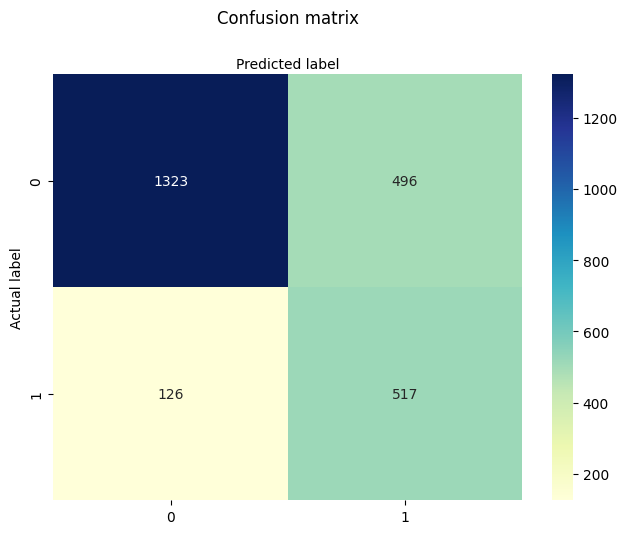

In [119]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [120]:
 #Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

print_scores(Y_test, pred1)
    

accuracy:  0.7473598700243704
precision:  0.510365251727542
recall:  0.8040435458786936
f1_score:  0.7612817126990056


In [121]:
TP = cnf_matrix1[1, 1]
FP = cnf_matrix1[0, 1]
FN = cnf_matrix1[1, 0]
TN = cnf_matrix1[0, 0]

print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Negative (TN): {TN}')

True Positive (TP): 517
False Positive (FP): 496
False Negative (FN): 126
True Negative (TN): 1323


Gini Coefficient: 0.6953395855224402
Mean Squared Error (MSE): 0.25264012997562957
Root Mean Squared Error (RMSE): 0.5026331962531221
Mean Absolute Error (MAE): 0.25264012997562957


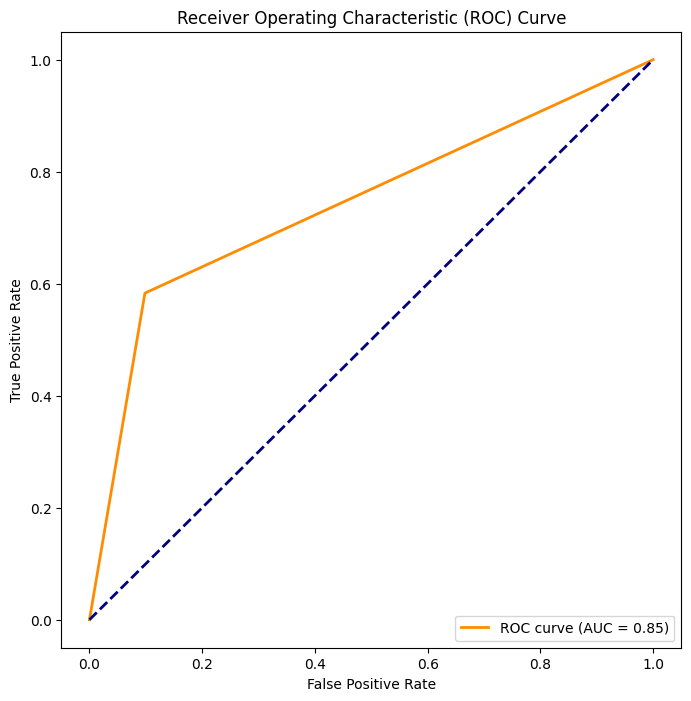

In [122]:
from sklearn.metrics import roc_curve, auc,mean_squared_error, mean_absolute_error,roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(Y_test, pred1)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr1, tpr1)
y_pred_lr1 = lm1.predict_proba(X_test)[:, 1]
roc_auc1 = roc_auc_score(Y_test, y_pred_lr1)
gini_coefficient1 = 2 * (roc_auc1 - 0.5)

print(f"Gini Coefficient: {gini_coefficient1}")\

mse1 = mean_squared_error(Y_test, pred1)
print(f'Mean Squared Error (MSE): {mse1}')

# Calculate RMSE (Root Mean Squared Error)
rmse1 = np.sqrt(mse1)
print(f'Root Mean Squared Error (RMSE): {rmse1}')

# Calculate MAE (Mean Absolute Error)
mae1 = mean_absolute_error(Y_test, pred1)
print(f'Mean Absolute Error (MAE): {mae1}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [123]:
a = lm1.predict([[0.234,0.45,0.023,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,1]])

In [124]:
if a == 0:
    print("will not churn")
else:
    print("will churn")

will churn


In [125]:
import joblib

filename = 'model.sav'
joblib.dump(lm1, filename)

['model.sav']